In [1]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as p
import spinmob as s
import scipy.io

In [66]:
def lorentz(x, x0,g1):
    y=0
    g1_sqr = np.square(g1)
    denom = np.pi * g1 * ((x-x0)**2 + g1_sqr)
    y += g1_sqr/denom
    return y

In [63]:
y = np.load('data/30_300_0.5.npy')/95.6
x = np.linspace(30,300,len(y))
y = y

In [41]:
np.where(x==95)

(array([130]),)

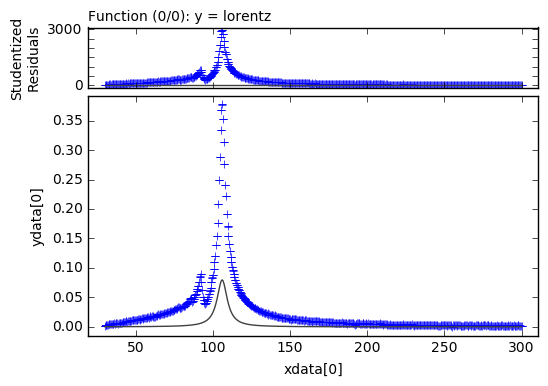

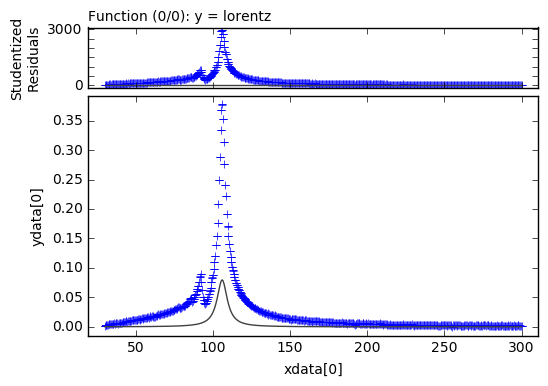

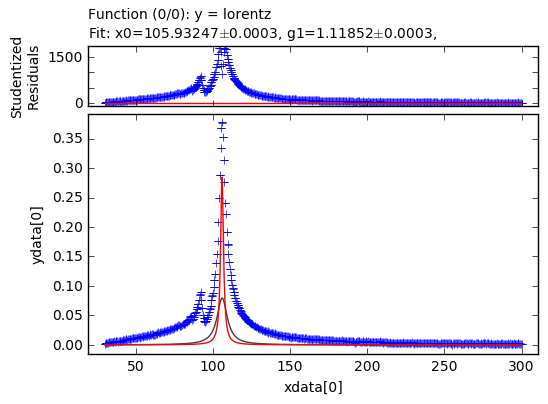


SETTINGS
  autoplot        True
  coarsen         [1]
  first_figure    0
  fpoints         [1000]
  plot_bg         [True]
  plot_ey         [True]
  plot_fit        [True]
  plot_guess      [True]
  plot_guess_zoom [False]
  scale_eydata    [1.0]
  silent          [False]
  style_bg        [{'color': 'k', 'marker': '', 'ls': '-'}]
  style_data      [{'color': 'b', 'marker': '+', 'ls': ''}]
  style_fit       [{'color': 'r', 'marker': '', 'ls': '-'}]
  style_guess     [{'color': '0.25', 'marker': '', 'ls': '-'}]
  subtract_bg     [False]
  xlabel          [None]
  xmax            [300.0]
  xmin            [30.0]
  xscale          ['linear']
  ylabel          [None]
  ymax            [0.37740585774058577]
  ymin            [0.00052301255230125529]
  yscale          ['linear']

CONSTANTS

GUESS (reduced chi squared = [ 175000.])
  x0         = 106.0
  g1         = 4.0

FIT RESULTS (reduced chi squared = [ 137000.])
  x0         = 105.93247 +/- 0.0003
  g1         = 1.11852 +/- 0.0003

In [67]:
fitter = s.data.fitter(f = lorentz, p = 'x0=106, g1=4')
fitter.set_data(xdata=x, ydata=y, eydata=0.0001)
fitter.fit()

In [6]:
mat = np.load('data/30_300_0.5.npy')
scipy.io.savemat('data/30_300_0.5.mat', mdict={'mat': mat})

In [60]:
from scipy.special import wofz
def V(x, x0 ,alpha, gamma):
    """
    Return the Voigt line shape at x with Lorentzian component HWHM gamma
    and Gaussian component HWHM alpha.

    """
    sigma = alpha / np.sqrt(2 * np.log(2))

    return np.real(wofz(((x-x0) + 1j*gamma)/sigma/np.sqrt(2))) / sigma\
                                                           /np.sqrt(2*np.pi) + 0.025

0.021421822823865979